# Certamen de Simulación Estocástica - Pregunta 4
- Diego Astaburuaga

**III.** Se desea estudiar, vía simulaciones, el comportamiento de un interruptor de potencia de alto voltaje. Este interruptor está compuesto por 5 componentes que trabajan en paralelo que reciben daño cuando hay un cortocircuito. Las componentes tienen una vida de 100 puntos los cuales se van gastando en la medida que reciben daños. Para realizar el estudio de simulación, se propone un modelo con las siguientes características:

- El daño es aleatorio y se divide entre el número de componentes que recibe daño.
> ¿Cómo se cuales componentes reciben daño?

> Mi solución fue que la probabilidad que reciban daño en un fallo distribuye Bernoulli de parámetro p proporcional a la vida que tenga.
- Las componentes menos dañadas son más propensas a recibir daño.
- En el momento que ocurre una falla, el número de componentes que recibe el daño es aleatorio.
> Este punto me parece confuso.
- El daño recibido es aleatorio y se modela por la variable aleatoria $Y=10X$ donde $X\sim Beta(\alpha,\beta)$.
> El daño total se reparte entre las componentes dañadas o se genera una Beta por cada componente dañada.
- Debido a que el cortocircuito ocurre con condiciones aleatorias, se considera que $\alpha \sim U[0.75,1.5]$, $\beta \sim U[2.75,3.25]$.

a) Escriba en forma de modelo gráfico lo que ocurre al momento de la falla.

> No me queda claro que es un modelo gráfico.

b) Realice histogramas que muestren el número de fallas, el total de daño que recibe el equipo, y otro de su interés.

> El número de fallas falta contarlo, el total de daño que se recibe por ronda se puede hacer...
> Creo que un punto imporante, es hacer muchas simulaciones y de ahí sacar conclusiones o gráficos interesantes,  ya que de eso se trata el curso.

Una componente muere si el daño total recibido es mayor o igual a 100 puntos, mientras que un equipo se declara inoperativo si todas sus componentes están muertas.

c) Proponga una distribución para los tiempos entre falla. Encuentre vía simulación el tiempo esperado en que el equipo se declara inoperativo (Proponga dos esquemas de fallas: mucha frecuencia y baja frecuencia.)

> Se utiliza la distribución exponencial por su simpleza, también se consideró usar la Weibull.

d) Para mayor protección, una empresa decide instalar varios equipos en paralelo, es decir, el equipo sistema se declara inoperativo si todos los equipos están inoperativos. Compare la distribución del tiempo de falla de esta configuración respecto a la de tener un solo equipo funcionando.

> Totalmente pendiente de momento.

**Obs 1:** Si se debe hacer una simplificación, debe especificarla.

## Preliminares.

Sobre la distribución Beta, realicemos unos gráficos para entender que posibles formas tendrá para los distintos valores de $\alpha$ y $\beta$.

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta as beta_distribution

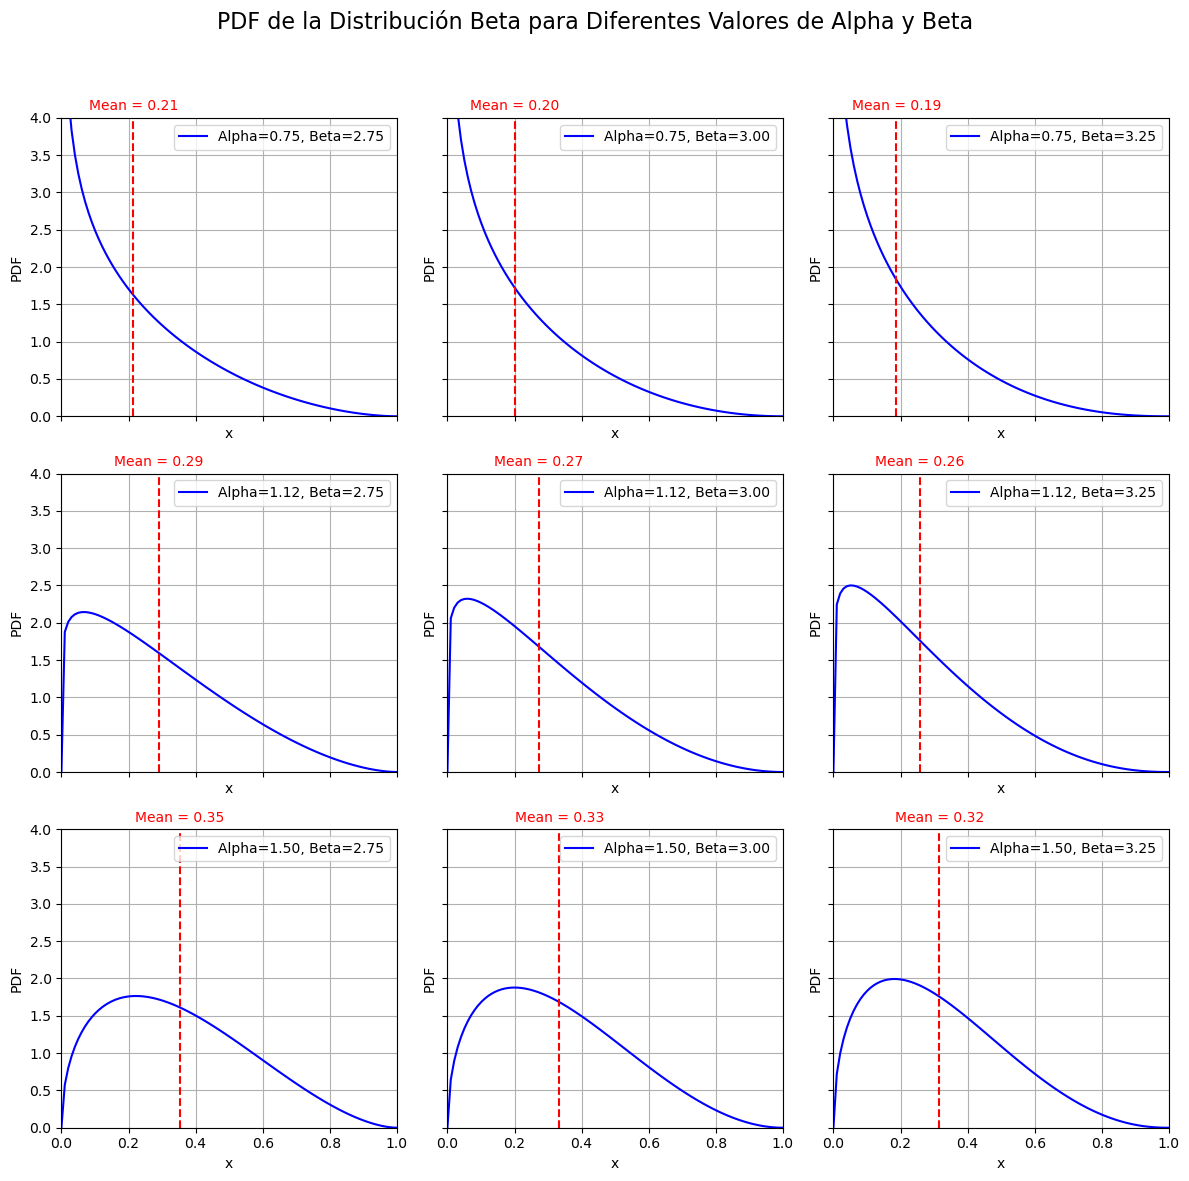

In [151]:
# Define los valores posibles para alpha y beta en los intervalos
alpha_values = np.linspace(0.75, 1.5, 3)
beta_values = np.linspace(2.75, 3.25, 3)

# Crea una grilla 3x3 de subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)
fig.suptitle('PDF de la Distribución Beta para Diferentes Valores de Alpha y Beta', fontsize=16)

# Establece los límites de los ejes x e y para todos los subplots
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 4)  # Puedes ajustar este límite según tus necesidades

# Itera a través de los valores de alpha y beta
for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        ax = axes[i, j]
        
        # Calcula la PDF de la distribución Beta para los valores de alpha y beta
        x = np.linspace(0, 1, 100)
        pdf = beta_distribution.pdf(x, alpha, beta)
        
        # Calcula la media de la distribución Beta
        mean = alpha / (alpha + beta)
        
        # Grafica la PDF en el subplot correspondiente
        ax.plot(x, pdf, label=f'Alpha={alpha:.2f}, Beta={beta:.2f}', color='blue')
        ax.axvline(x=mean, color='red', linestyle='--')
        ax.text(mean, 4.1, f'Mean = {mean:.2f}', color='red', ha='center')
        ax.set_xlabel('x')
        ax.set_ylabel('PDF')
        ax.grid(True)
        ax.legend()

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Muestra los gráficos
plt.show()

## a) Modelado gráfico.

- https://tereom.github.io/est-computacional-2018/modelos-graficos-y-simulacion-predictiva.html

- https://hmn.wiki/es/Graphical_model

i) Hay cortocircuito

ii) Enumerando las componentes, se propone que la i-ésima tenga probabilidad $p_i$ de fallar con
$$
p_i=\frac{\text{puntos de vida de i}}{\text{puntos del sistema}}
$$
en caso de que ninguna falle en el cortocircuito, todas reciben daño de la misma manera.

iii) Se obtienen $\alpha$ y $\beta$ desde las distribuciones uniformes correspondientes.

iv) Se calcula el daño como $10X$ para $X$ una muestra desde la distribución $Beta$ correspondiente, este se reparte en partes iguales entre los equipos que fallaron.

Comentarios de esta decisión:
- Inicialmente $p_i=0.2$ y la probabilidad de que el sistema se dañe es proporcional a la cantidad de vida que tiene.
- El daño que se excede al morir una componente se pierde y no se distribuye, esto dado que una vez el daño llegó, este no puede moverse a otra componente.
- Se puede modelar la probabilidad de que todas las componentes reciban daño a la vez.
- El esquema general es: Hay una falla, está viene con un daño total (aleatorio) y de forma aleatoria ve entre que componentes lo distribuye.

## Modelado

Supongamos que el número de fallas por unidad de tiempo distribuye Poisson de parámetro $\lambda$, entonces el tiempo entre fallas distribuye exponencial del mismo parámetro bajo la parametrización:
$$
f(x,\lambda)=\lambda\exp(-\lambda x)
$$
donde $\lambda$ corresponde al número de fallas en promedio por unidad de tiempo.

## Component and Damage Simulation

This code simulates the behavior of 5 components, each with 100 points of life. The simulation continues until all components have no life left.

### Simulation Steps

1. Exponential random variables are generated to represent the time between failures.
2. The probability of failure is calculated for each component based on its current life.
3. Bernoulli trials are performed to determine if components fail.
4. If some components fail, random damage is calculated based on Beta distributions.
5. Component life is updated based on the received damage.
6. Results of each round are recorded in a DataFrame.

### Results

- Time between failures, total time, total damage, and details of each component are recorded in each round.


In [152]:
class Component:
    def __init__(self, id):
        self.id = id
        self.health = 100
        self.alive = True

    def is_alive(self):
        return self.alive

    def take_damage(self, damage):
        self.health -= damage
        if self.health <= 0:
            self.health = 0
            self.alive = False

class Simulation:
    def __init__(self, lambda_param):
        self.components = [Component(i) for i in range(1, 6)]
        self.exponential_variables = []
        self.simulation_data = []  # List to store data for each round
        self.lambda_param = lambda_param

    def simulate_round(self):
        # Get alive components
        alive_components = [component for component in self.components if component.is_alive()]
        
        if alive_components:
            
            # Generate an exponential random variable
            exponential_var = np.random.exponential(1 / self.lambda_param)
            self.exponential_variables.append(exponential_var)

            # Calculate probabilities for Bernoulli trials
            total_health = sum(component.health for component in alive_components)
            probabilities = [component.health / total_health if component.is_alive() else 0 for component in alive_components]
            
            # Ensure there is a probability for each component, even if they don't fail
            bernoulli_results = [np.random.binomial(1, p) for p in probabilities] + [0] * (5 - len(alive_components))

            # Calculate total damage
            damage_total = 0

            # Determine which components take damage
            selected_components = [i for i, result in enumerate(bernoulli_results) if result == 1]

            if not selected_components:
                selected_components = list(range(len(alive_components)))  # All alive components take damage

            # Generate alpha and beta parameters from uniform distributions
            alpha = np.random.uniform(0.75, 1.5)
            beta = np.random.uniform(2.75, 3.25)

            # Calculate damage per selected component using alpha and beta
            damage_total = (10 * np.random.beta(alpha, beta))
                        

            for i, component_index in enumerate(selected_components):
                damage = damage_total/len(selected_components)
                alive_components[component_index].take_damage(damage)

            # Calculate probabilities and damage for each component
            component_data = []
            for component in alive_components:
                pi = component.health / total_health if component.is_alive() else 0
                took_damage = 1 if bernoulli_results[component.id - 1] == 1 else 0
                component_data.extend([component.health, pi, took_damage])

            # Create a list with data for this round
            round_data = [exponential_var, sum(self.exponential_variables), damage_total] + component_data

            # Add data for this round to the simulation data list
            self.simulation_data.append(round_data)

    def run_simulation(self):
        while any(component.is_alive() for component in self.components):
            self.simulate_round()

In [153]:
def Simulation_to_df(lambda_param=1):
    sim = Simulation(lambda_param=lambda_param)
    sim.run_simulation()

    # Create a DataFrame with simulation data
    column_names = ["Time Between Failures", "Total Time", "Total Damage"]
    for i in range(1, 6):
        column_names.extend([f"Component Life {i}", f"Component Probability {i}", f"Component Damage {i}"])
    
    df = pd.DataFrame(sim.simulation_data, columns=column_names)
    df.fillna(0, inplace=True)
    return df

In [154]:
df = Simulation_to_df()

In [155]:
df

,Time Between Failures,Total Time,Total Damage,Component Life 1,Component Probability 1,Component Damage 1,Component Life 2,Component Probability 2,Component Damage 2,Component Life 3,Component Probability 3,Component Damage 3,Component Life 4,Component Probability 4,Component Damage 4,Component Life 5,Component Probability 5,Component Damage 5
0,0.433979,0.433979,0.846724,99.830655,0.199661,0,99.830655,0.199661,0.0,99.830655,0.199661,0.0,99.830655,0.199661,0.0,99.830655,0.199661,0.0
1,1.341074,1.775054,1.726352,99.830655,0.200000,0,99.830655,0.200000,0.0,99.830655,0.200000,0.0,99.830655,0.200000,0.0,98.104303,0.196541,1.0
2,0.963885,2.738939,3.380003,99.830655,0.200694,0,98.140654,0.197297,1.0,98.140654,0.197297,1.0,99.830655,0.200694,0.0,98.104303,0.197224,0.0
3,0.339543,3.078482,1.828105,99.221287,0.200834,1,97.531285,0.197413,1.0,98.140654,0.198646,0.0,99.830655,0.202067,0.0,97.494935,0.197339,1.0
4,0.562584,3.641066,0.262712,99.221287,0.201580,0,97.531285,0.198146,0.0,98.140654,0.199384,0.0,99.567943,0.202284,1.0,97.494935,0.198072,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.663273,172.616813,0.837194,0.000000,0.000000,0,2.317234,0.408612,0.0,2.638783,0.465313,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
181,1.138006,173.754819,0.697159,1.968655,0.397225,0,2.290204,0.462106,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
182,0.989403,174.744221,2.960642,0.000000,0.000000,0,2.290204,0.537751,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
183,1.365200,176.109421,1.938877,0.351326,0.153404,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


## b) Entendiendo una simulación.

Order of Component Deaths: ['1', (4, 5), '3', '2']


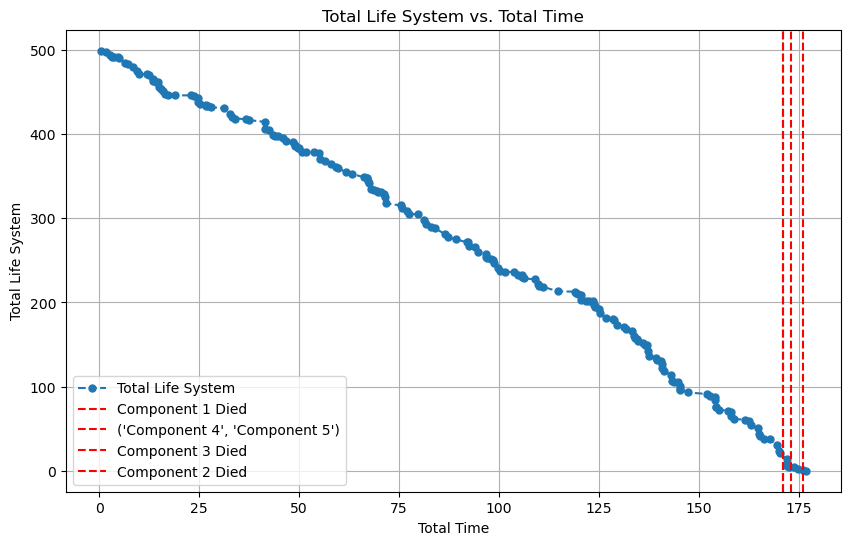

In [156]:
# Calculate the total life in each round
df["Total Life System"] = df["Component Life 1"] + df["Component Life 2"] + df["Component Life 3"] + df["Component Life 4"] + df["Component Life 5"]

# Create a list to keep track of components that have already died
dead_components = []
death_order = []

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df["Total Time"], df["Total Life System"], linestyle="--", marker="o", markersize=5, label="Total Life System")
plt.xlabel("Total Time")
plt.ylabel("Total Life System")
plt.title("Total Life System vs. Total Time")
plt.grid(True)

# Mark the moment when a component dies for the first time
for index, row in df.iterrows():
    dead_components_this_round = []
    for i in range(1, 6):
        component = f"Component Life {i}"
        if row[component] == 0 and i not in dead_components:
            dead_components_this_round.append(i)
            dead_components.append(i)

    if dead_components_this_round:
        if len(dead_components_this_round) == 1:
            death_text = f'Component {dead_components_this_round[0]} Died'
        else:
            death_text = tuple(f'Component {c}' for c in dead_components_this_round)
        
        death_order.extend(dead_components_this_round)
        plt.axvline(x=int(row["Total Time"]), color='red', linestyle='--', label=death_text)

plt.legend()

# Format the order of component deaths for printing
formatted_order = []
current_group = []

for i, component in enumerate(death_order):
    if i == 0:
        current_group.append(component)
    elif component == death_order[i - 1] + 1:
        current_group.append(component)
    else:
        if len(current_group) == 1:
            formatted_order.append(str(current_group[0]))
        else:
            formatted_order.append(tuple(current_group))
        current_group = [component]

if len(current_group) == 1:
    formatted_order.append(str(current_group[0]))
else:
    formatted_order.append(tuple(current_group))

# Display the order of component deaths
print(f"Order of Component Deaths: {formatted_order}")
plt.show()

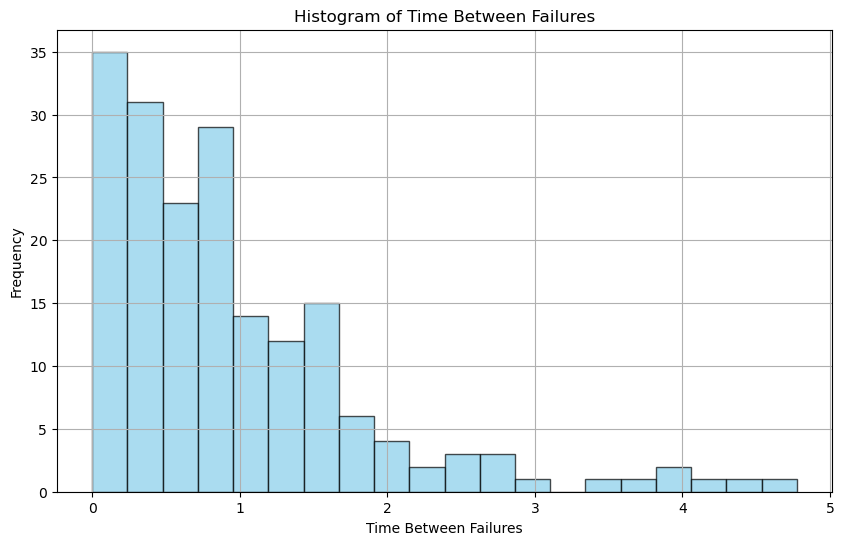

In [157]:
# Create a histogram for the time between failures
plt.figure(figsize=(10, 6))
plt.hist(df["Time Between Failures"], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Time Between Failures")
plt.ylabel("Frequency")
plt.title("Histogram of Time Between Failures")
plt.grid(True)
plt.show()

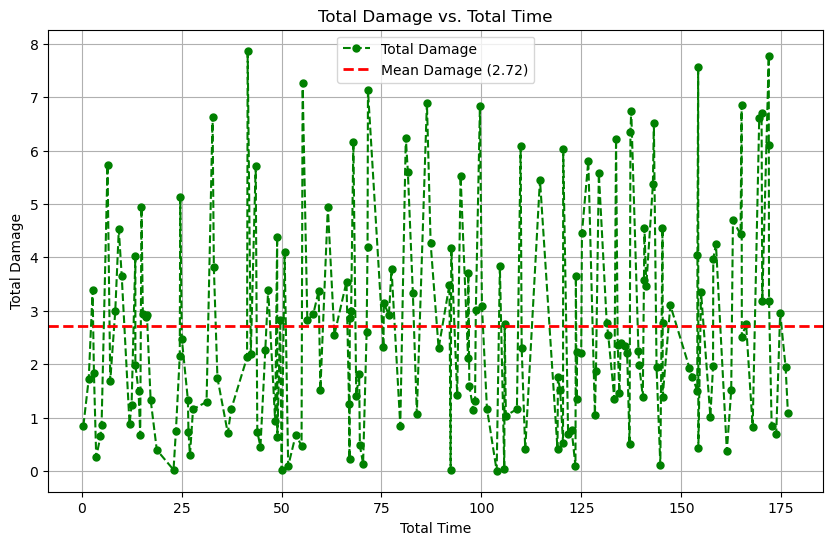

In [158]:
# Assuming you already have the DataFrame df generated

# Calculate the mean of Total Damage
mean_damage = df["Total Damage"].mean()

# Create the plot for damage distribution
plt.figure(figsize=(10, 6))
plt.plot(df["Total Time"], df["Total Damage"], linestyle="--", marker=".", markersize=10, color='green', label="Total Damage")
plt.axhline(mean_damage, color='red', linestyle='--', label=f"Mean Damage ({mean_damage:.2f})", linewidth=2)  # Add the mean line
plt.xlabel("Total Time")
plt.ylabel("Total Damage")
plt.title("Total Damage vs. Total Time")
plt.grid(True)

plt.legend()
plt.show()

## c) Múltiples simulaciones.

Note que $\lambda$ es el promedio de fallos por unidad de tiempo, por lo tanto es de esperarse que a mayor $\lambda$, menor es el tiempo esperado de supervivencia del sistema. Por lo tanto se adelanta que posiblemente el modelo sea de la forma:
$$
E(T(\lambda))=\beta/\lambda
$$
donde $E(T(\lambda))$ corresponde al tiempo en promedio en que se espera que el sistema quede inoperativo en función del parámetro $\lambda$ y $\beta$ es un parámetro para la regresión.

Tomando logartimo a ambos lados:

$$
\log(E(T(\lambda)))=\log(\beta)-\log(\lambda)
$$

In [159]:
df

,Time Between Failures,Total Time,Total Damage,Component Life 1,Component Probability 1,Component Damage 1,Component Life 2,Component Probability 2,Component Damage 2,Component Life 3,Component Probability 3,Component Damage 3,Component Life 4,Component Probability 4,Component Damage 4,Component Life 5,Component Probability 5,Component Damage 5,Total Life System
0,0.433979,0.433979,0.846724,99.830655,0.199661,0,99.830655,0.199661,0.0,99.830655,0.199661,0.0,99.830655,0.199661,0.0,99.830655,0.199661,0.0,499.153276
1,1.341074,1.775054,1.726352,99.830655,0.200000,0,99.830655,0.200000,0.0,99.830655,0.200000,0.0,99.830655,0.200000,0.0,98.104303,0.196541,1.0,497.426924
2,0.963885,2.738939,3.380003,99.830655,0.200694,0,98.140654,0.197297,1.0,98.140654,0.197297,1.0,99.830655,0.200694,0.0,98.104303,0.197224,0.0,494.046921
3,0.339543,3.078482,1.828105,99.221287,0.200834,1,97.531285,0.197413,1.0,98.140654,0.198646,0.0,99.830655,0.202067,0.0,97.494935,0.197339,1.0,492.218816
4,0.562584,3.641066,0.262712,99.221287,0.201580,0,97.531285,0.198146,0.0,98.140654,0.199384,0.0,99.567943,0.202284,1.0,97.494935,0.198072,0.0,491.956104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,0.663273,172.616813,0.837194,0.000000,0.000000,0,2.317234,0.408612,0.0,2.638783,0.465313,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.956018
181,1.138006,173.754819,0.697159,1.968655,0.397225,0,2.290204,0.462106,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,4.258859
182,0.989403,174.744221,2.960642,0.000000,0.000000,0,2.290204,0.537751,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.290204
183,1.365200,176.109421,1.938877,0.351326,0.153404,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.351326


In [160]:
n_itr = 1_000
lambda_options = np.logspace(start=-2, stop=1, num=9)

# Diccionarios para almacenar datos por lambda_param
data_by_lambda = {
    'Lambda': [],
    'Mean_Time': [],
    'Variance_Time': [],
    'Mean_Total_Failures': []
}

total_time_per_lambda = {}

for lambda_option in lambda_options:
    total_time_array = []
    total_failures_array = []

    for _ in range(n_itr):
        df = Simulation_to_df(lambda_param=lambda_option)
        total_time_array.append(df["Total Time"].iloc[-1])
        total_failures_array.append(len(df))
    
    # Calcular promedios y varianza
    mean_time = np.mean(total_time_array)
    variance_time = np.var(total_time_array)
    mean_total_failures = np.mean(total_failures_array)

    # Agregar los datos al diccionario
    data_by_lambda['Lambda'].append(lambda_option)
    data_by_lambda['Mean_Time'].append(mean_time)
    data_by_lambda['Variance_Time'].append(variance_time)
    data_by_lambda['Mean_Total_Failures'].append(mean_total_failures)

    total_time_per_lambda[lambda_option] = total_time_array

# Crear un DataFrame con los promedios y varianzas de los tiempos y promedio de fallos totales
summary_data = pd.DataFrame(data_by_lambda)

# Mostrar el DataFrame
print(summary_data)
#print(total_time_per_lambda)

      Lambda     Mean_Time  Variance_Time  Mean_Total_Failures
0   0.010000  18650.886267   2.672694e+06              186.886
1   0.023714   7904.336244   4.626270e+05              187.168
2   0.056234   3319.442464   9.159120e+04              187.142
3   0.133352   1400.610981   1.546782e+04              186.800
4   0.316228    591.029666   2.587371e+03              187.133
5   0.749894    248.875677   5.012749e+02              187.320
6   1.778279    105.679262   9.417390e+01              187.444
7   4.216965     44.279492   1.676122e+01              186.916
8  10.000000     18.703296   2.776024e+00              186.969


Note que los números de fallos en promedios necesarios para que el sistema quede inoperativo es constante en función de $\lambda$, por otro lado, notemos que del modelo que asumimos antes, utilizamos
$$
E(T(\lambda))*\lambda=\beta
$$
donde podriamos considerar $\beta=187$ el número de fallos en promedio. 

Este gráfico considera la varianza.

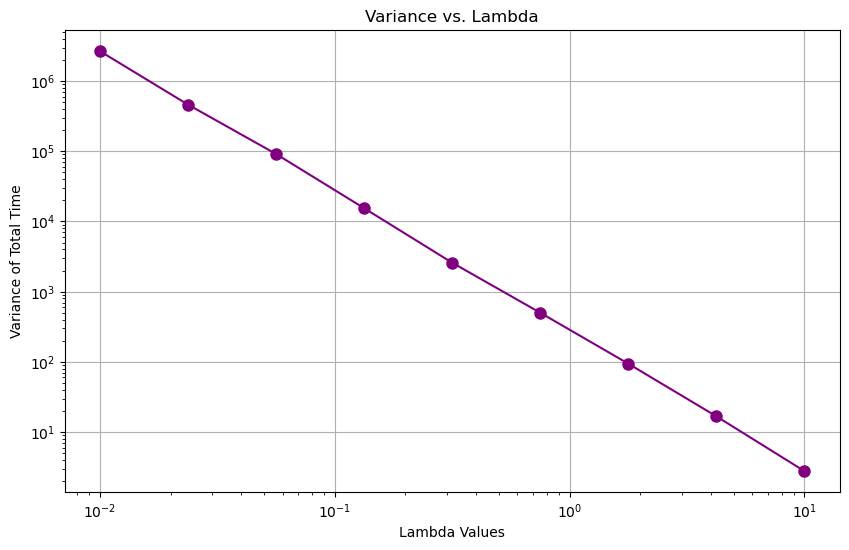

In [161]:
# Utilizar el DataFrame summary_data para graficar la varianza vs. lambda
plt.figure(figsize=(10, 6))
plt.plot(summary_data['Lambda'], summary_data['Variance_Time'], marker='o', color='purple', linestyle='-', markersize=8)
plt.xscale('log')  # Logarithmic scale on the x-axis
plt.yscale('log')  # Logarithmic scale on the y-axis
plt.xlabel('Lambda Values')
plt.ylabel('Variance of Total Time')
plt.title('Variance vs. Lambda')
plt.grid(True)
plt.show()

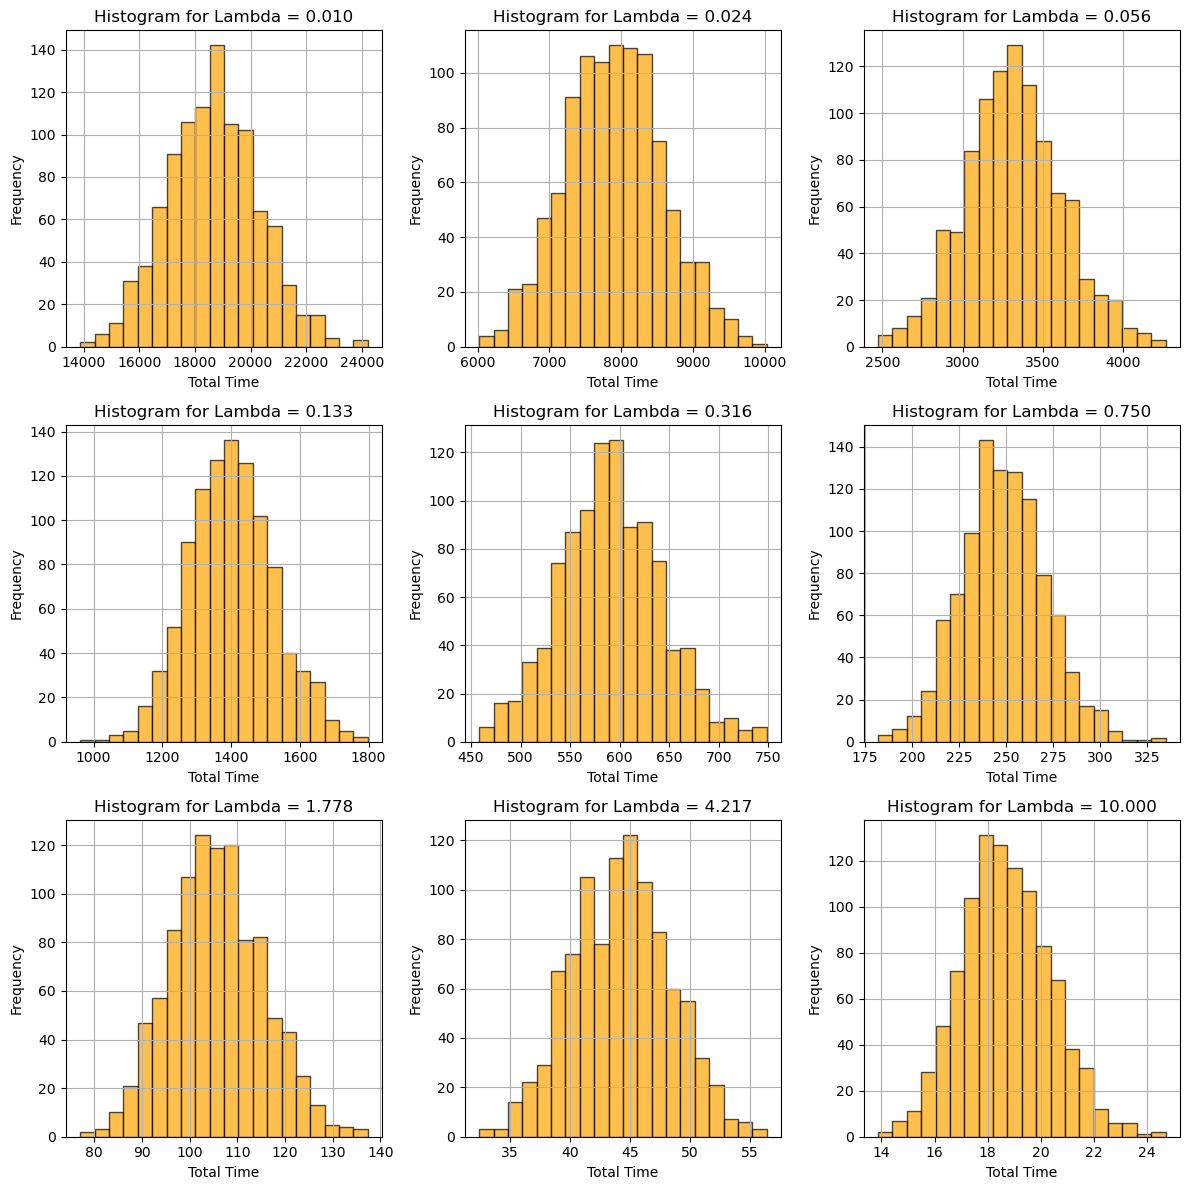

In [162]:
# Crear una grilla 3x3 para mostrar los histogramas
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
color = 'orange' # Todos los histogramas serán de color naranja

# Iterar a través de los valores de lambda_param y mostrar los histogramas en la grilla
for (lambda_option, times), ax in zip(total_time_per_lambda.items(), axes.ravel()):
    ax.hist(times, bins=20, color=color, edgecolor='k', alpha=0.7)
    ax.set_xlabel('Total Time')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for Lambda = {lambda_option:.3f}')
    ax.grid(True)

# Ajustar el espaciado entre los subplots para que se vean mejor
plt.tight_layout()
plt.show()

Se verifica en cierta forma el teorema central del límite con el gráfico anterior.

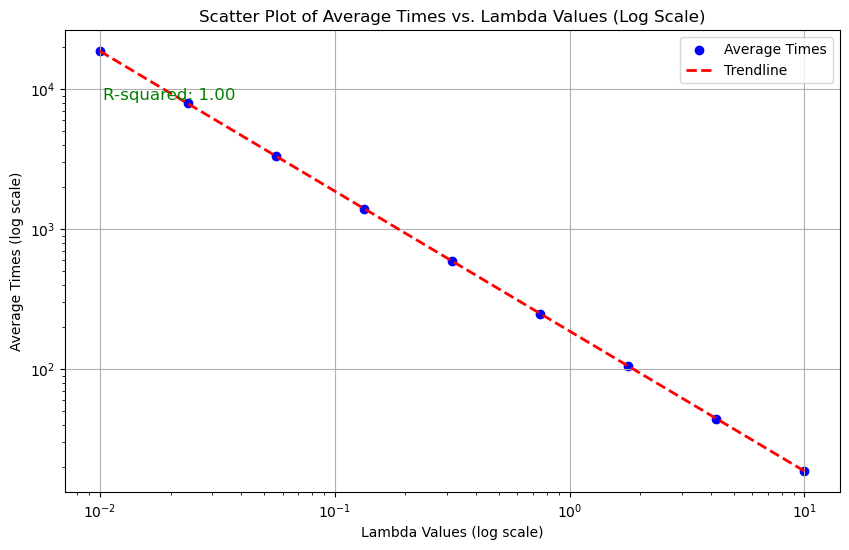

In [163]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# Extract keys (lambda values) and values (average times) from the dictionary
lambda_values = summary_data['Lambda'].tolist()
average_times = summary_data['Mean_Time'].tolist()

# Create a scatter plot with logarithmic scale on both axes
plt.figure(figsize=(10, 6))
plt.scatter(lambda_values, average_times, marker='o', c='b', label='Average Times')
plt.xscale('log')  # Logarithmic scale on the x-axis
plt.yscale('log')  # Logarithmic scale on the y-axis
plt.xlabel('Lambda Values (log scale)')
plt.ylabel('Average Times (log scale)')
plt.title('Scatter Plot of Average Times vs. Lambda Values (Log Scale)')
plt.grid(True)
plt.legend()

# Fit a linear trendline on the logarithmic scale
coefficients = np.polyfit(np.log10(lambda_values), np.log10(average_times), 1)
trendline = np.poly1d(coefficients)
x_range = np.logspace(np.log10(min(lambda_values)), np.log10(max(lambda_values)), 100)
plt.plot(x_range, 10**trendline(np.log10(x_range)), 'r--', label='Trendline', linewidth=2)

# Calculate R-squared (coefficient of determination)
predicted_log_times = trendline(np.log10(lambda_values))
r_squared = r2_score(np.log10(average_times), predicted_log_times)
r_squared_text = f'R-squared: {r_squared:.2f}'
plt.annotate(r_squared_text, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='green')

plt.legend()
plt.show()


Se verifica lo que se había comentado.

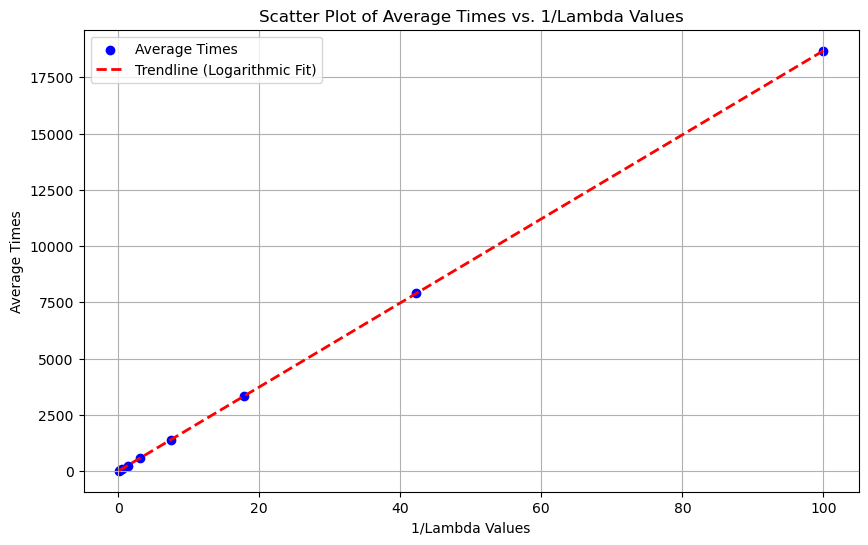

In [164]:
# Extract keys (lambda values) and values (average times) from the dictionary
lambda_values = summary_data['Lambda'].tolist()
average_times = summary_data['Mean_Time'].tolist()

lambda_values = 1/np.array(lambda_values)

# Create a scatter plot without logarithmic scale on both axes
plt.figure(figsize=(10, 6))
plt.scatter(lambda_values, average_times, marker='o', c='b', label='Average Times')
plt.xlabel('1/Lambda Values')
plt.ylabel('Average Times')
plt.title('Scatter Plot of Average Times vs. 1/Lambda Values')
plt.grid(True)
plt.legend()

# Fit a logarithmic trendline
coefficients = np.polyfit(np.log(lambda_values), np.log(average_times), 1)
a, b = coefficients
x_range = np.linspace(min(lambda_values), max(lambda_values), 100)
trendline = np.exp(a * np.log(x_range) + b)
plt.plot(x_range, trendline, 'r--', label='Trendline (Logarithmic Fit)', linewidth=2)

plt.legend()
plt.show()


In [165]:
print(a, b, np.exp(b))

0.9997599753920402 5.231148397908147 187.00743920498442


Visto de otra forma se llega al mismo resultado.

Las observaciones dan a entender que, existe una relación funcional entre los tiempos de falla del equipo como sistema total y el parámetro $\lambda$ que modela los tiempos de falla. Esto sería natural si el sistema recibiera daño de forma deterministica con cada fallo, lo cual no es cierto dado que el daño y distribución de este también es aleatorio y no depende del parámetro $\lambda$, por lo que el experimento de simulación muestra que de cierta forma, a pesar de la aleatoriedad que exista dentro del modelo que es independiente de los tiempos entre falla, esta en promedio no afecta al tiempo de falla del sistema en su totalidad.

Como consecuencia, se podrían proponer métodos para estimar el valor de $\lambda$ teniendo en cuenta los tiempos entre falla para obtener una estimación mediante la relación halla en las gráficas para el tiempo esperado que en el sistema en su totalidad falla.

En resumen de lo anterior, podríamos encontrar el tiempo promedio para el cual el sistema queda inoperativo mediante realizar una estimación del parámetro $\lambda$.

Notese que el modelo de supervivencia que subyace mediante utilizar la exponencial provee una taza de fallos constantes, lo cual se puede generalizar al utilizar una distribución de Weibull que podría permitir encontrar análisis más enriquecedores que permitirían generar modelos para los cuales, mediante simulación, encontrar la relación funcional en caso de existir y utilizar inferencia sobre los parámetros de la distribución para determinar el tiempo promedio de supervivencia del sistema.

## d) Múltiples equipos.

Para el caso anterior, defina $T_i$ para $i=1,...,n$ la variable aleatoria que modela la duración del equipo $i$, luego la variable de interés en este problema es
$$
T=\max\{T_1,...,T_n\}
$$
donde asumiremos $T_1,...,T_n$ mutuamente independientes.

In [166]:
def Simulation_Sistem_to_df(lambda_param=1, n_disp=5):
    total_time_array = []

    for _ in range(n_disp):
        df = Simulation_to_df(lambda_param=lambda_param)
        total_time_array.append(df["Total Time"].iloc[-1])
    return np.max(total_time_array)

In [167]:
n_itr = 1_200
n_disp = 7
lambda_options = np.logspace(start=-2, stop=1, num=9)

# Diccionarios para almacenar datos por lambda_param
data_by_lambda = {
    'Lambda': [],
    'Mean_Time': [],
    'Variance_Time': [],
}

total_time_per_lambda_extended = {}

for lambda_option in lambda_options:
    total_time_array = []

    for _ in range(n_itr):
        total_time_array.append(Simulation_Sistem_to_df(lambda_param=lambda_option, n_disp=n_disp))
    
    # Calcular promedios y varianza
    mean_time = np.mean(total_time_array)
    variance_time = np.var(total_time_array)

    # Agregar los datos al diccionario
    data_by_lambda['Lambda'].append(lambda_option)
    data_by_lambda['Mean_Time'].append(mean_time)
    data_by_lambda['Variance_Time'].append(variance_time)

    total_time_per_lambda_extended[lambda_option] = total_time_array

# Crear un DataFrame con los promedios y varianzas de los tiempos y promedio de fallos totales
summary_data_extended = pd.DataFrame(data_by_lambda)

# Mostrar el DataFrame
print(summary_data_extended)
#print(total_time_per_lambda_extended)

      Lambda     Mean_Time  Variance_Time
0   0.010000  21067.865506   1.282430e+06
1   0.023714   8877.858414   2.437758e+05
2   0.056234   3748.172971   4.069224e+04
3   0.133352   1577.567490   7.226503e+03
4   0.316228    665.530379   1.324906e+03
5   0.749894    280.925868   2.231603e+02
6   1.778279    118.419793   4.061821e+01
7   4.216965     50.020881   7.182899e+00
8  10.000000     21.112908   1.360910e+00


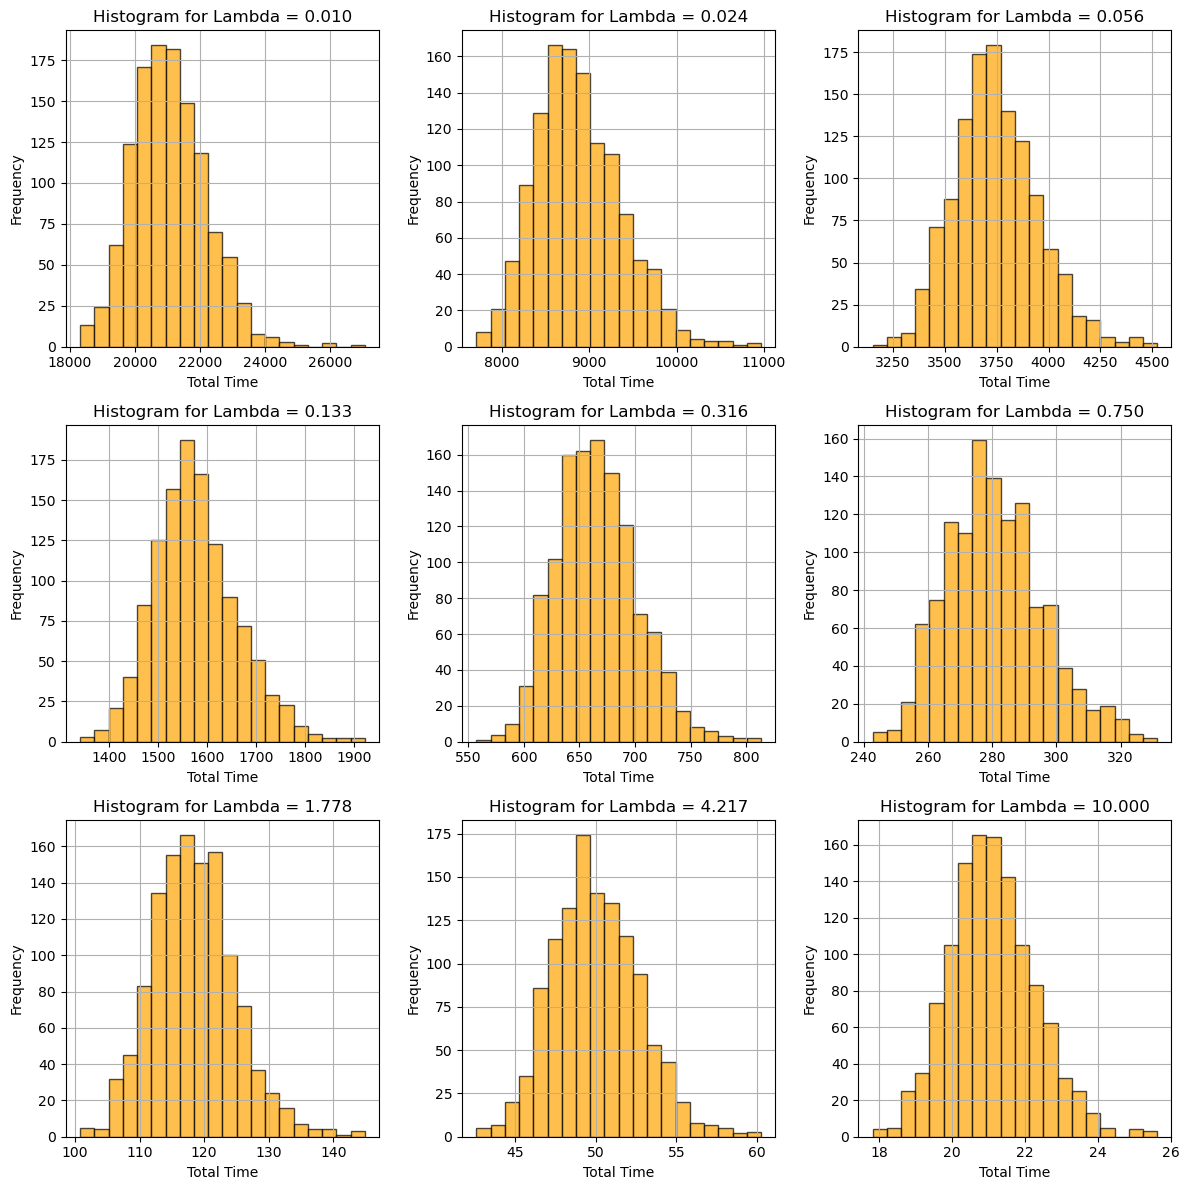

In [168]:
# Crear una grilla 3x3 para mostrar los histogramas
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
color = 'orange' # Todos los histogramas serán de color naranja

# Iterar a través de los valores de lambda_param y mostrar los histogramas en la grilla
for (lambda_option, times), ax in zip(total_time_per_lambda_extended.items(), axes.ravel()):
    ax.hist(times, bins=20, color=color, edgecolor='k', alpha=0.7)
    ax.set_xlabel('Total Time')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram for Lambda = {lambda_option:.3f}')
    ax.grid(True)

# Ajustar el espaciado entre los subplots para que se vean mejor
plt.tight_layout()
plt.show()

In [169]:
# Renombrar las columnas en summary_data_extended
summary_data_extended = summary_data_extended.rename(columns={
    'Mean_Time': 'Mean_Time_Extended',
    'Variance_Time': 'Variance_Time_Extended'
})

# Unir los DataFrames en base a la columna Lambda
merged_summary_data = pd.merge(summary_data, summary_data_extended, on='Lambda', how='inner')

# Eliminar columna extra
merged_summary_data.drop(columns='Mean_Total_Failures', inplace=True)

# Mostrar el DataFrame resultante
merged_summary_data

,Lambda,Mean_Time,Variance_Time,Mean_Time_Extended,Variance_Time_Extended
0,0.010000,18650.886267,2.672694e+06,21067.865506,1.282430e+06
1,0.023714,7904.336244,4.626270e+05,8877.858414,2.437758e+05
2,0.056234,3319.442464,9.159120e+04,3748.172971,4.069224e+04
3,0.133352,1400.610981,1.546782e+04,1577.567490,7.226503e+03
4,0.316228,591.029666,2.587371e+03,665.530379,1.324906e+03
5,0.749894,248.875677,5.012749e+02,280.925868,2.231603e+02
6,1.778279,105.679262,9.417390e+01,118.419793,4.061821e+01
7,4.216965,44.279492,1.676122e+01,50.020881,7.182899e+00
8,10.000000,18.703296,2.776024e+00,21.112908,1.360910e+00


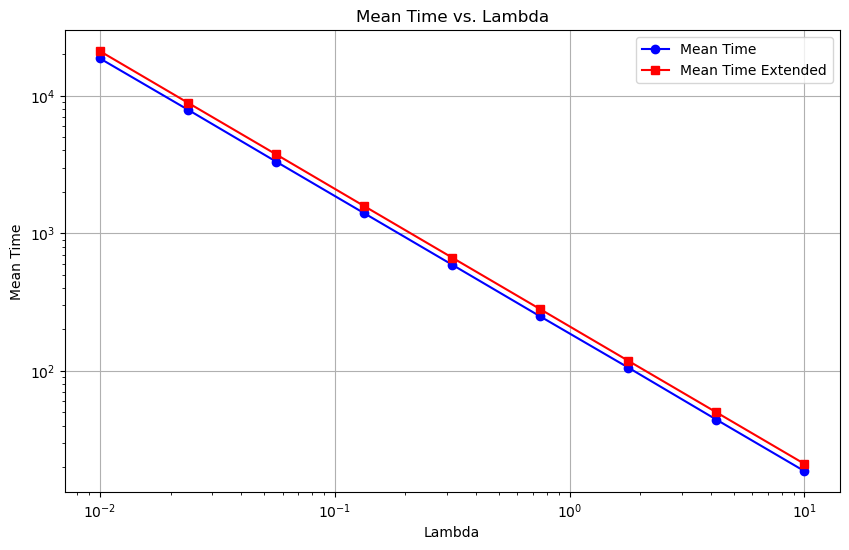

In [170]:
# Crear una figura para el gráfico de medias
plt.figure(figsize=(10, 6))

# Graficar la media
plt.plot(merged_summary_data['Lambda'], merged_summary_data['Mean_Time'], marker='o', label='Mean Time', color='blue')

# Graficar la media extendida
plt.plot(merged_summary_data['Lambda'], merged_summary_data['Mean_Time_Extended'], marker='s', label='Mean Time Extended', color='red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda')
plt.ylabel('Mean Time')
plt.title('Mean Time vs. Lambda')
plt.grid(True)
plt.legend()

plt.show()

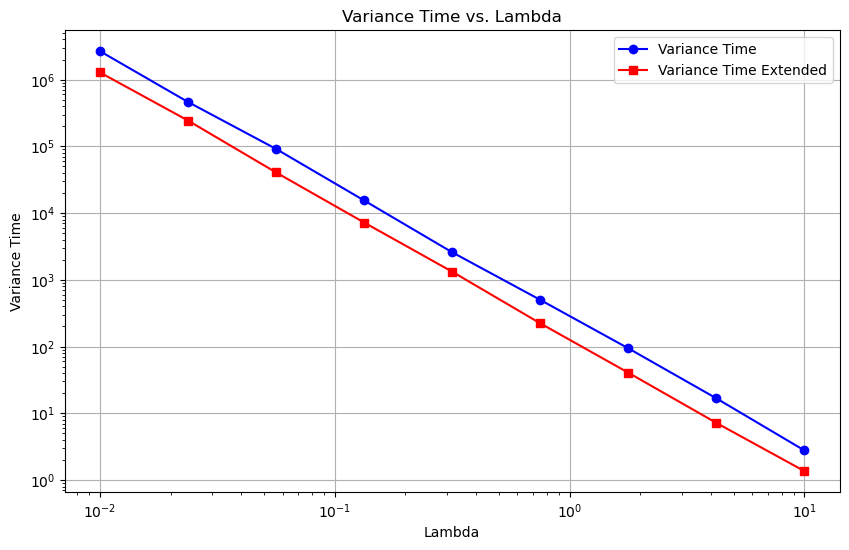

In [171]:
# Crear una figura para el gráfico de varianzas
plt.figure(figsize=(10, 6))

# Graficar la varianza
plt.plot(merged_summary_data['Lambda'], merged_summary_data['Variance_Time'], marker='o', label='Variance Time', color='blue')

# Graficar la varianza extendida
plt.plot(merged_summary_data['Lambda'], merged_summary_data['Variance_Time_Extended'], marker='s', label='Variance Time Extended', color='red')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Lambda')
plt.ylabel('Variance Time')
plt.title('Variance Time vs. Lambda')
plt.grid(True)
plt.legend()

plt.show()

Se concluye de este análisis que el considerar varios equipos en paralelo permite aumentar el tiempo de vida esperado de forma clara sin importar el valor de $\alpha$, además, permite reducir significativamente la varianza.

> Debería tener los códigos listos, falta considerar el hecho de que para el caso con múltiples dispositivos, comparar las distribuciones vs los casos para un sólo dispositivo para comparar los tiempos de falla.